In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df["Postal Code"] = df["Postal Code"].fillna(df["Postal Code"].mode()[0])

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [8]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55222.544694,230.769059
std,2829.160653,32059.043706,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
sub_cat_sales = df.groupby(["Sub-Category"])["Sales"].sum()

In [11]:
sub_cat_sales

Sub-Category
Accessories    164186.7000
Appliances     104618.4030
Art             26705.4100
Binders        200028.7850
Bookcases      113813.1987
Chairs         322822.7310
Copiers        146248.0940
Envelopes       16128.0460
Fasteners        3001.9600
Furnishings     89212.0180
Labels          12347.7260
Machines       189238.6310
Paper           76828.3040
Phones         327782.4480
Storage        219343.3920
Supplies        46420.3080
Tables         202810.6280
Name: Sales, dtype: float64

<Figure size 9000x8000 with 0 Axes>

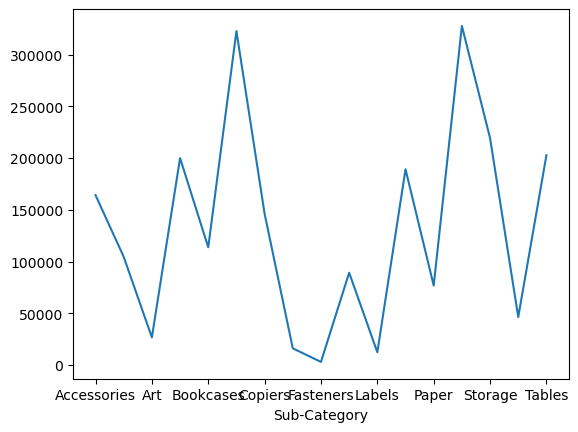

<Figure size 9000x8000 with 0 Axes>

In [12]:
sub_cat_sales.plot(kind = 'line')
plt.figure(figsize=(90,80))

In [37]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year
0,1,2456,1970-01-01 00:00:00.000000314,476,2,143,166,0,0,194,15,42420.0,2,12,0,4,386,261.9600,1970
1,2,2456,1970-01-01 00:00:00.000000314,476,2,143,166,0,0,194,15,42420.0,2,55,0,5,838,731.9400,1970
2,3,2254,1970-01-01 00:00:00.000000456,673,2,237,201,1,0,265,3,90036.0,3,946,1,10,1432,14.6200,1970
3,4,4295,1970-01-01 00:00:00.000000432,774,3,705,687,0,0,153,8,33311.0,2,319,0,16,366,957.5775,1970
4,5,4295,1970-01-01 00:00:00.000000432,774,3,705,687,0,0,153,8,33311.0,2,1316,1,14,573,22.3680,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,2064,1970-01-01 00:00:00.000000821,1191,3,691,663,1,0,80,11,60610.0,0,773,1,3,408,3.7980,1970
9796,9797,1144,1970-01-01 00:00:00.000000441,697,3,179,164,1,0,483,33,43615.0,1,515,1,2,277,10.3680,1970
9797,9798,1144,1970-01-01 00:00:00.000000441,697,3,179,164,1,0,483,33,43615.0,1,1860,2,13,724,235.1880,1970
9798,9799,1144,1970-01-01 00:00:00.000000441,697,3,179,164,1,0,483,33,43615.0,1,1706,2,13,148,26.3760,1970


In [38]:
year_sales = df.groupby(['year'])['Sales'].sum()

<AxesSubplot:xlabel='year'>

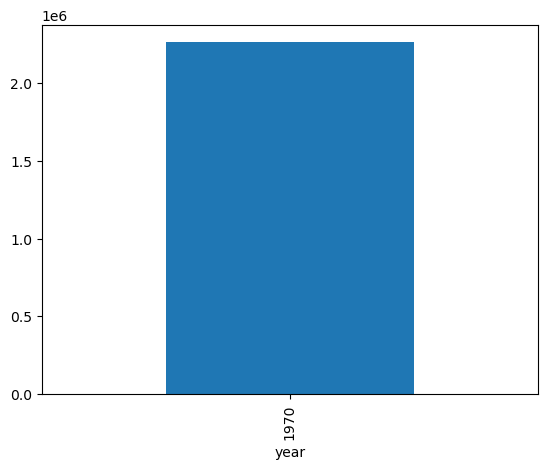

In [39]:
year_sales.plot(kind = 'bar')

In [40]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year
0,1,2456,1970-01-01 00:00:00.000000314,476,2,143,166,0,0,194,15,42420.0,2,12,0,4,386,261.9600,1970
1,2,2456,1970-01-01 00:00:00.000000314,476,2,143,166,0,0,194,15,42420.0,2,55,0,5,838,731.9400,1970
2,3,2254,1970-01-01 00:00:00.000000456,673,2,237,201,1,0,265,3,90036.0,3,946,1,10,1432,14.6200,1970
3,4,4295,1970-01-01 00:00:00.000000432,774,3,705,687,0,0,153,8,33311.0,2,319,0,16,366,957.5775,1970
4,5,4295,1970-01-01 00:00:00.000000432,774,3,705,687,0,0,153,8,33311.0,2,1316,1,14,573,22.3680,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,2064,1970-01-01 00:00:00.000000821,1191,3,691,663,1,0,80,11,60610.0,0,773,1,3,408,3.7980,1970
9796,9797,1144,1970-01-01 00:00:00.000000441,697,3,179,164,1,0,483,33,43615.0,1,515,1,2,277,10.3680,1970
9797,9798,1144,1970-01-01 00:00:00.000000441,697,3,179,164,1,0,483,33,43615.0,1,1860,2,13,724,235.1880,1970
9798,9799,1144,1970-01-01 00:00:00.000000441,697,3,179,164,1,0,483,33,43615.0,1,1706,2,13,148,26.3760,1970


In [41]:
high_sale_product = df.groupby(['Category','Sub-Category','year','Product Name'])['Sales'].sum()

In [42]:
high_sale_product

Category  Sub-Category  year  Product Name
0         4             1970  166              400.0268
                              167             7539.7122
                              168             5184.0810
                              169             5492.8850
                              316             1897.8102
                                                ...    
2         13            1970  1844             477.6600
                              1845             215.8920
                              1846             223.8880
                              1847             442.5540
                              1848            1112.7880
Name: Sales, Length: 1849, dtype: float64

In [43]:
df.Category.unique()

array([0, 1, 2])

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
for i in df:
    if df[i].dtype =='object' :
        
        df[i] = le.fit_transform(df[i])

In [18]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,2456,314,476,2,143,166,0,0,194,15,42420.0,2,12,0,4,386,261.9600
1,2,2456,314,476,2,143,166,0,0,194,15,42420.0,2,55,0,5,838,731.9400
2,3,2254,456,673,2,237,201,1,0,265,3,90036.0,3,946,1,10,1432,14.6200
3,4,4295,432,774,3,705,687,0,0,153,8,33311.0,2,319,0,16,366,957.5775
4,5,4295,432,774,3,705,687,0,0,153,8,33311.0,2,1316,1,14,573,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,2064,821,1191,3,691,663,1,0,80,11,60610.0,0,773,1,3,408,3.7980
9796,9797,1144,441,697,3,179,164,1,0,483,33,43615.0,1,515,1,2,277,10.3680
9797,9798,1144,441,697,3,179,164,1,0,483,33,43615.0,1,1860,2,13,724,235.1880
9798,9799,1144,441,697,3,179,164,1,0,483,33,43615.0,1,1706,2,13,148,26.3760


In [19]:
x = df.drop('Sales', axis =1)
y = df['Sales']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [21]:
lg = LinearRegression()

In [22]:
lg.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = lg.predict(x_test)

In [25]:
y_pred

array([237.48535245, 260.67716639, 215.65859799, ..., 231.52915616,
       239.24124634, 234.28918398])

In [36]:
r2_score(y_test,y_pred)

0.005690537905786108

In [30]:

from statsmodels.tsa.arima.model import ARIMA



# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate sales by date
sales_data = df.groupby('Order Date')['Sales'].sum().reset_index()

# Train-test split (e.g., using the last 12 months for testing)
train_data = sales_data[:-12]
test_data = sales_data[-12:]

# Fit ARIMA model
model = ARIMA(train_data['Sales'], order=(5,1,0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Print predictions
print(predictions)


1218    2884.752859
1219    2488.096872
1220    2886.547245
1221    2373.326783
1222    2781.777098
1223    2588.228423
1224    2666.737193
1225    2629.217155
1226    2661.878865
1227    2609.642887
1228    2659.983547
1229    2634.580568
Name: predicted_mean, dtype: float64
